## Import libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

## Working with open CV

The type of this input is <class 'numpy.ndarray'>
Shape: (57, 75, 3)


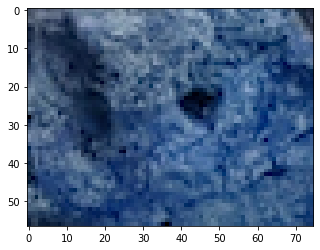

In [173]:
# image sample

image = cv2.imread('img4.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

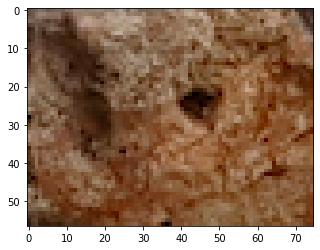

In [175]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

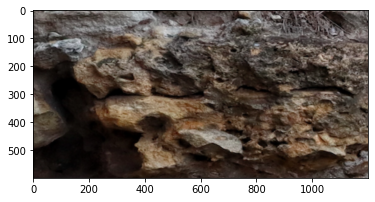

In [170]:
# resize image 

resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

## Colour identification 

In [6]:
# function returning hex values of colour we want to identify 

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [7]:
# 1. KMeans expects flattened array as input during its fit method, thus reshape the image using numpy
# 2. apply KMeans to first fit and then predict on the image to get the results
# 3. cluster colors are identified an arranged in the correct order ->  plot the colors as a pie chart

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [237]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

[array([60.2188937 , 46.24207548, 36.94843958]),
 array([123.51071817, 109.82310634,  97.95137354]),
 array([13.76131843,  8.44205024,  6.21437491]),
 array([101.60424716,  87.4843502 ,  76.35376045]),
 array([148.04800219, 135.22122154, 122.38918351]),
 array([80.86188261, 66.64694969, 56.240798  ]),
 array([171.10937968, 164.63220457, 157.16791529]),
 array([38.76944826, 26.3311225 , 19.25303879])]

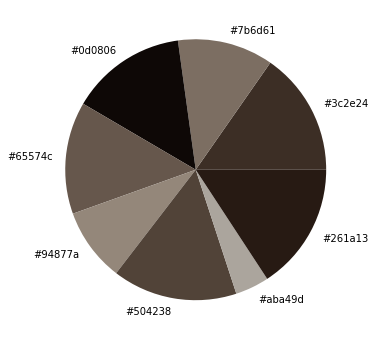

In [247]:
get_colors(get_image('img1.jpg'), 8, True)

In [239]:
# from model above we can extractt major colors

## Search images using colour 

In [240]:
print ([name for name in os.listdir('images/')])

['kelly-sikkema-YgREE-2uo3k-unsplash.jpg', 'img4.jpg', 'img3.jpg', 'img2.jpg', 'annie-spratt-im8y4BO2hso-unsplash.jpg', 'img1.jpg', 'sincerely-media-H2cqAH5dxSE-unsplash.jpg', 'stepan-sargsyan-hxk3iYQyjG0-unsplash.jpg']


In [248]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    '1':[60.2188937 , 46.24207548, 36.94843958],
     '2':[123.51071817, 109.82310634,  97.95137354],
     '3':[13.76131843,  8.44205024,  6.21437491],
     '4':[101.60424716,  87.4843502 ,  76.35376045],
     '5':[148.04800219, 135.22122154, 122.38918351],
     '6':[80.86188261, 66.64694969, 56.240798],
     '7':[171.10937968, 164.63220457, 157.16791529],
     '8':[38.76944826, 26.3311225 , 19.25303879]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

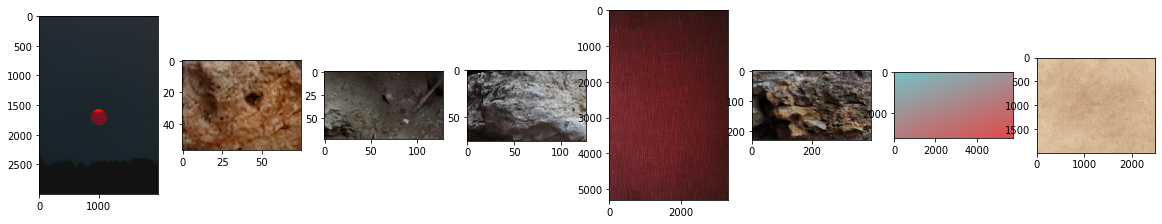

In [249]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [250]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 5): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [251]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 8, index)
            plt.imshow(images[i])
            index += 1

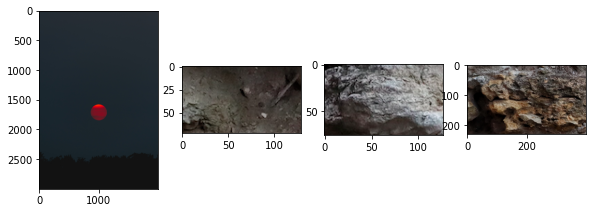

In [254]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['8'], 10, 5)

In [ ]:
10, 5
100, 1
60, 5
60, 1
10, 5 (4)